# **Polynomial Regression**

## **Written by:** Aarish Asif Khan

## **Date:** 24 February 2024

In [69]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Print the 5 rows of the datset
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [71]:
# Selecting relevant features and handling missing values
selected_features = ['age', 'fare']

X = titanic_df[selected_features].values
y = titanic_df['survived'].values

In [72]:
# Handle missing values (fill with mean)
X[np.isnan(X)] = np.nanmean(X)

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Polynomial regression
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [75]:
# Initialize and train the model
model = LinearRegression()

model.fit(X_train_poly, y_train)

LinearRegression()

In [76]:
# Predictions
train_predictions = model.predict(X_train_poly)
test_predictions = model.predict(X_test_poly)

In [77]:
# Calculate RMSE for both train and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

# Print RMSE for both train and test sets
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Calculate MAE for both train and test sets
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print MAE for both train and test sets
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')


Train RMSE: 0.4609661636749235
Test RMSE: 0.4594302249134657
Train MAE: 0.4249796081063598
Test MAE: 0.4271205714818712


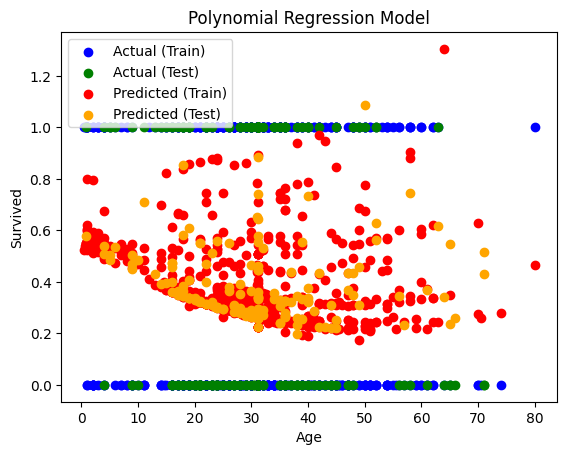

In [78]:
# Visualize the model
plt.scatter(X_train[:, 0], y_train, color='blue', label='Actual (Train)')
plt.scatter(X_test[:, 0], y_test, color='green', label='Actual (Test)')
plt.scatter(X_train[:, 0], train_predictions, color='red', label='Predicted (Train)')
plt.scatter(X_test[:, 0], test_predictions, color='orange', label='Predicted (Test)')
plt.title('Polynomial Regression Model')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()
plt.show()